In [1]:
import qiskit_metal as qm

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.qubits.star_qubit import StarQubit
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
def ChipSize(x:str, y:str, cheese: bool = False, layer: int = 0):
    design.chips.main.size.size_x = x
    design.chips.main.size.size_y = y
    design.chips.default_settings['cheese'] = cheese
    design.chips.default_settings['layer_start'] = layer

In [5]:
ChipSize('11mm', '11mm', False, 0)

In [6]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        all_component_names = design.components.keys()
        if n==1:
            gui.edit_component(['Q1'])
        gui.zoom_on_components(all_component_names)
        if hlt:
            all_component_names = design.components.keys()
            gui.highlight_components(all_component_names)
        gui.screenshot()

In [7]:
def clean():
    design.delete_all_components()

In [33]:
def Sixpiece(a = 6):
    options = Dict(
        layer = '0',
        radius = '300um',
        center_radius = '100um',
        gap_couplers = '25um',
        gap_readout = '10um',
        connector_length = '75um',
        trap_offset = '20um',
        junc_h = '100um',
        cpw_width = '0.01',
        rotation_cpl1 = '0.0',
        rotation_cpl2 = '60.0',
        rotation_rdout = '270.0',
        rotation_cpl3 = '120.0',
        rotation_cpl4 = '180.0',
        number_of_connectors = 4,
        resolution = 16,
        cap_style = 'round'
    )
    
    q1 = StarQubit(design, 'Q1', options=Dict(pos_x='+0.00mm', pos_y=str(a*np.sqrt(3)/2) + 'mm', orientation = -30, **options))
    q2 = StarQubit(design, 'Q2', options=Dict(pos_x=str(a/2) + 'mm', pos_y='+0.00mm', orientation = 90, **options))
    q3 = StarQubit(design, 'Q3', options=Dict(pos_x=str(-a/2) + 'mm', pos_y='+0.00mm', orientation = 90,  **options))
    q4 = StarQubit(design, 'Q4', options=Dict(pos_x= '0mm', pos_y='+0.00mm', orientation = 90,  **options))
    q5 = StarQubit(design, 'Q5', options=Dict(pos_x=str(-a/4) + 'mm', pos_y= str(a*np.sqrt(3)/4) + 'mm', orientation = -30,  **options))
    q6 = StarQubit(design, 'Q6', options=Dict(pos_x=str(a/4) + 'mm', pos_y= str(a*np.sqrt(3)/4) + 'mm', orientation = 210,  **options))
    
    guidraw(n=6, hlt=True)

In [34]:
clean()

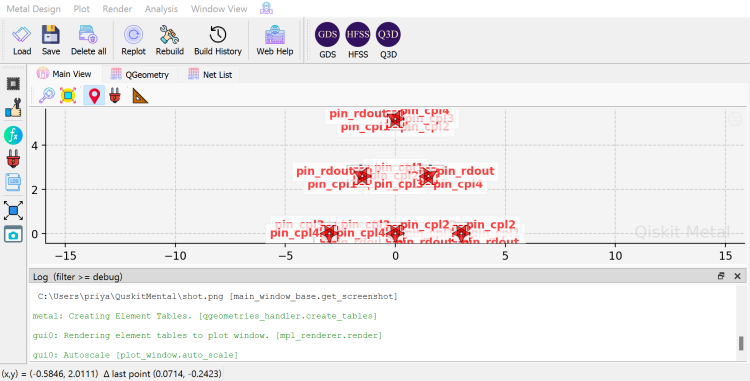

In [35]:
Sixpiece()

In [36]:
def connectingStar(design, start_component, start_pin, end_component, end_pin):
    ops= Dict(fillet = '90um')
    route_options = Dict(
        total_length='9mm',
        hfss_wire_bonds=True,
        pin_inputs=Dict(
            start_pin=Dict(
                component=start_component,
                pin=start_pin
            ),
            end_pin=Dict(
                component=end_component,
                pin=end_pin
            )
        ),
        lead=Dict(
            start_straight='0.1mm',
            end_straight='0.1mm'
        ),
        meander=Dict(asymmetry='-0.5mm'),
        layer=0,
        **ops
    )
    
    route_name = f'cpw_{start_component}_{end_component}'
    
    existing_route = globals().get(route_name)
    if existing_route:
        existing_route.delete()
    
    globals()[route_name] = RouteStraight(design, options=route_options)

    guidraw(n=3)

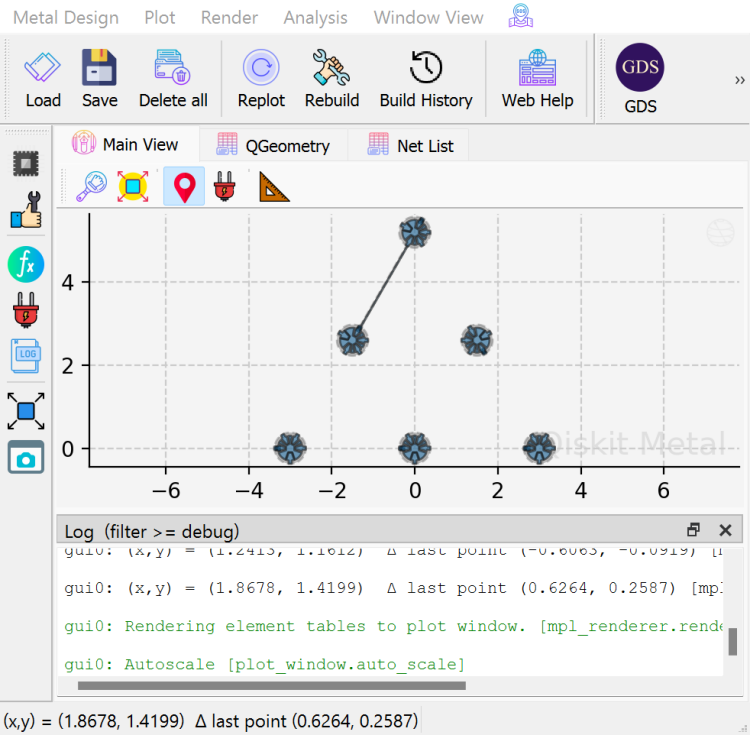

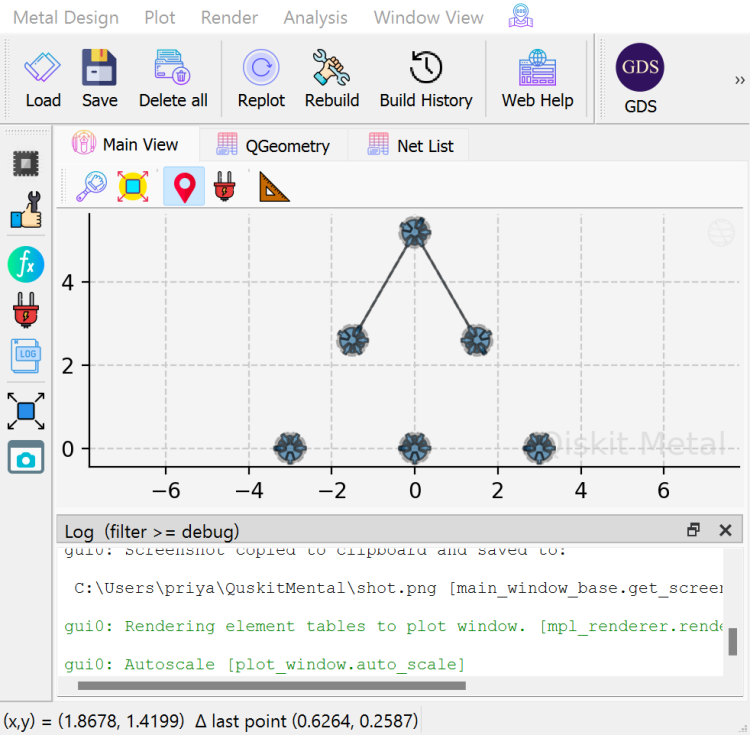

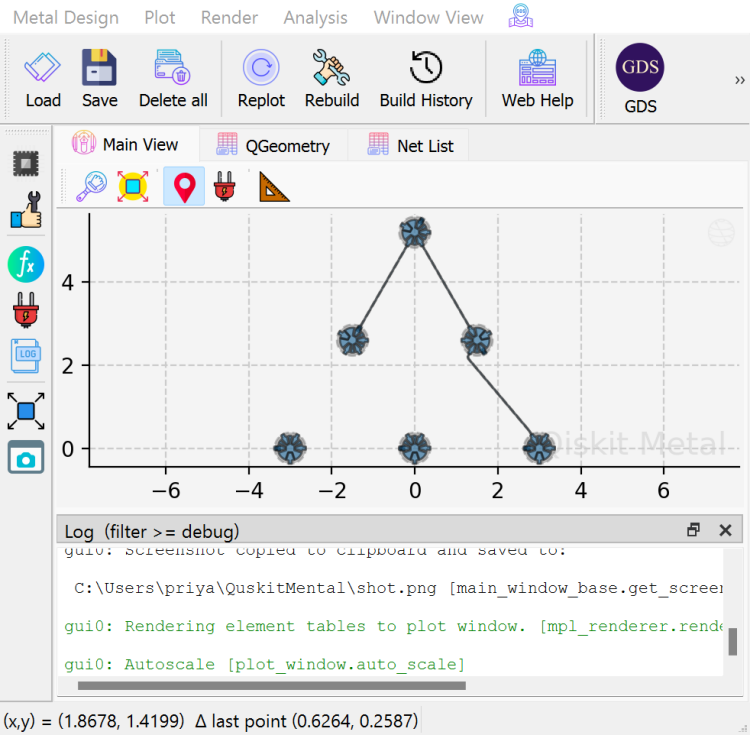

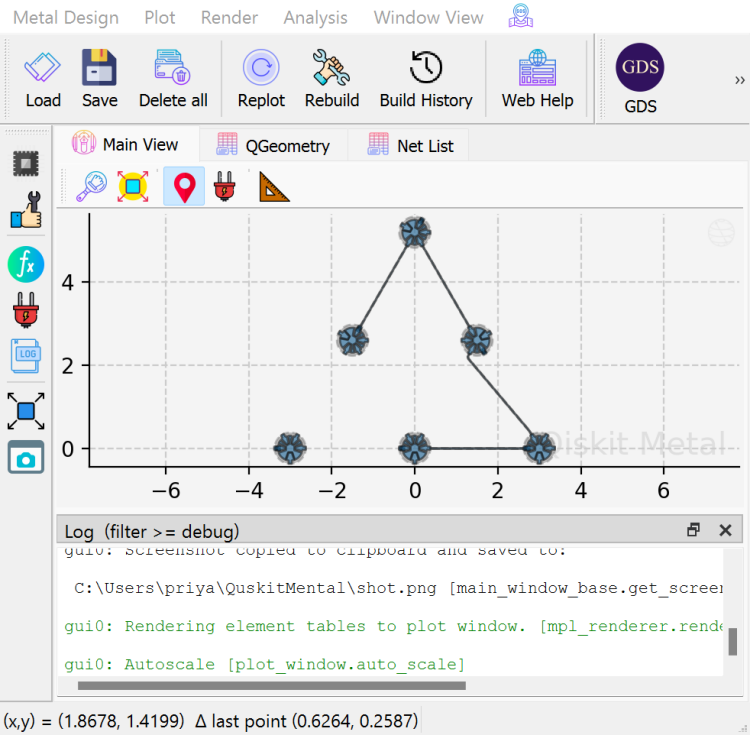

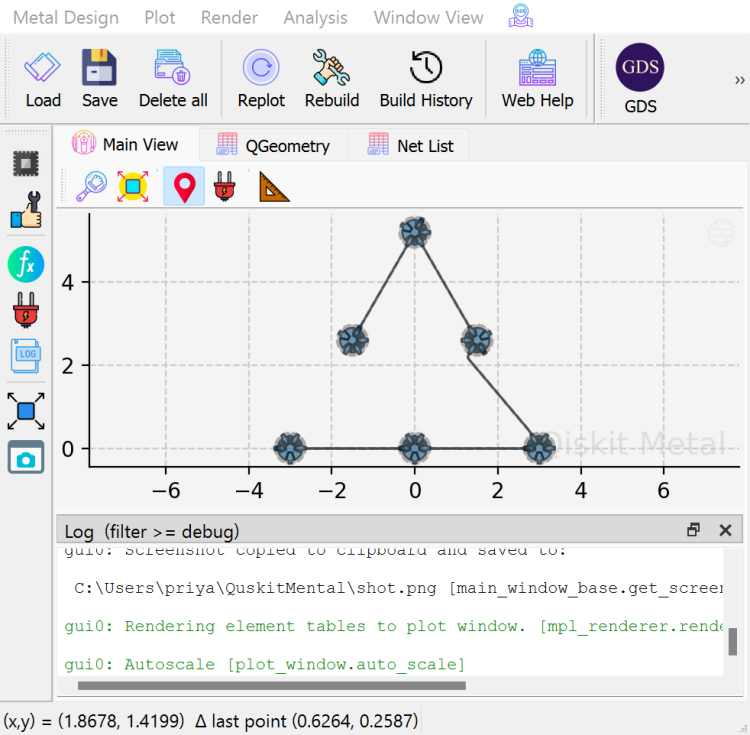

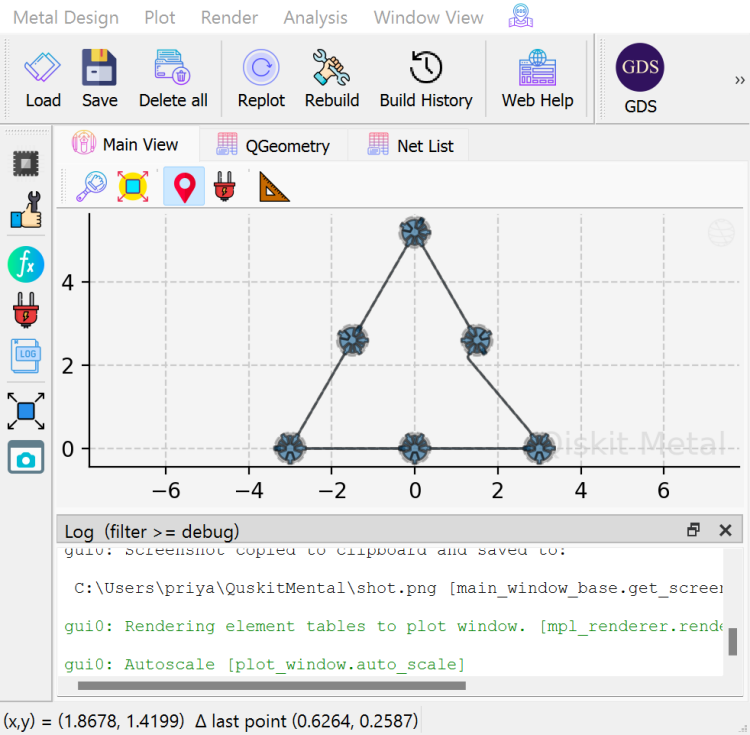

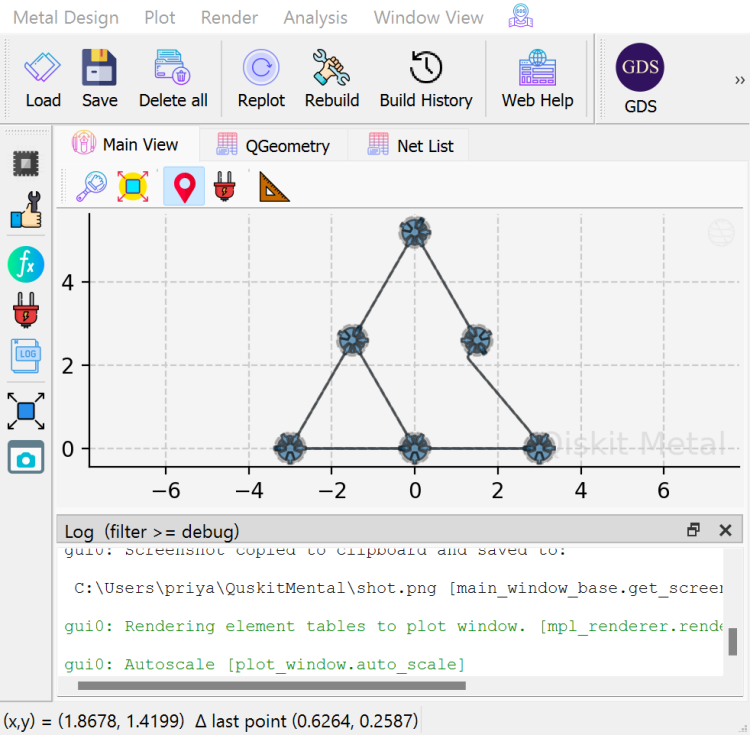

03:12AM 26s WARNING [__init__]: Pin pin_cpl3 of component Q6 is already in use. None has not been built. Please check your pin_input values.


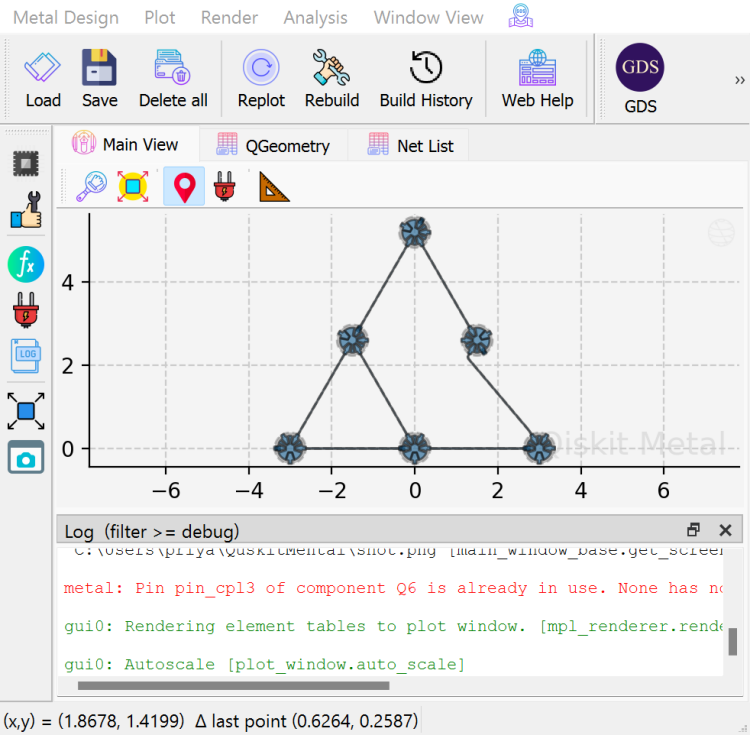

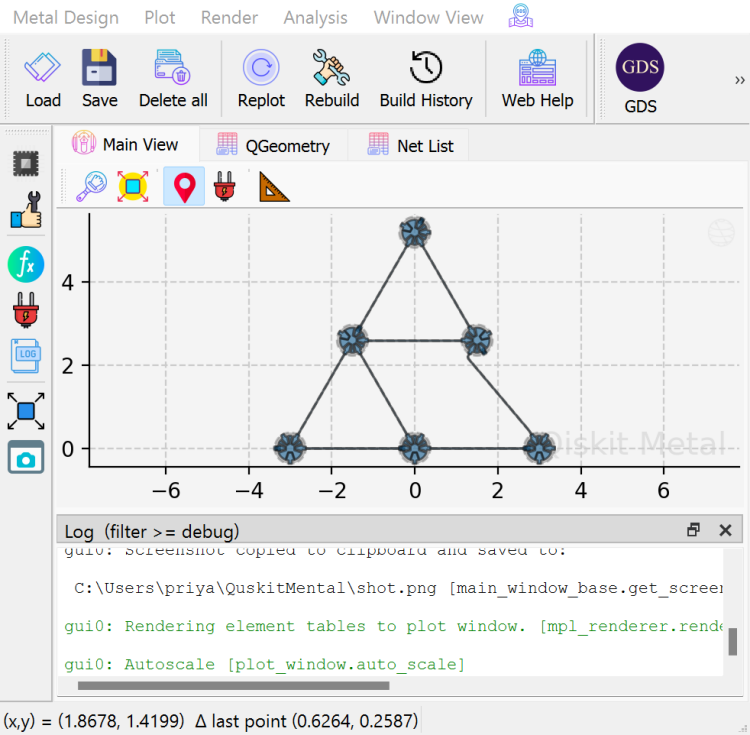

In [37]:
connectingStar(design, 'Q1', 'pin_cpl1', 'Q5', 'pin_cpl4')
connectingStar(design, 'Q1', 'pin_cpl2', 'Q6', 'pin_cpl1')
connectingStar(design, 'Q2', 'pin_cpl3', 'Q6', 'pin_cpl3')
connectingStar(design, 'Q2', 'pin_cpl4', 'Q4', 'pin_cpl1')
connectingStar(design, 'Q3', 'pin_cpl1', 'Q4', 'pin_cpl4')
connectingStar(design, 'Q3', 'pin_cpl2', 'Q5', 'pin_cpl1')
connectingStar(design, 'Q5', 'pin_cpl2', 'Q4', 'pin_cpl3')
connectingStar(design, 'Q6', 'pin_cpl3', 'Q4', 'pin_cpl2')
connectingStar(design, 'Q5', 'pin_cpl3', 'Q6', 'pin_cpl2')